# Temperature

This notebook explores the analysis and sonification of temperature data in the UK from 2024 to 2098.
The ambient air temperature near the surface, typically at a height of 2m, is considered. The data represents the mean area average over three area aggregations: grid point, country level (NUTS level 0).

#### Workflow

1. **Data Loading and Preprocessing**
    - Import necessary libraries.
    - Load the temperature data from the CSV file.
    - Parse dates and filter the data for the years 2024 to 2098.
    - Convert temperature from Kelvin to Celsius.

2. **Data Analysis**
    - Calculate the mean temperature for each month and year.
    - Plot the mean temperature over the years.

3. **Sonification**
    - Normalize the temperature values.
    - Generate effects signals based on temperature.
    - Apply effects to the signals.
    - Combine the generated signals with a tree sound.

4. **Visualization**
    - Plot the final signal waveform.
    - Plot the monthly temperature for the year 2040.

5. **Sound Design**
    - Extract minimum and maximum temperatures.
    - Implement dynamic tempo, pitch shift, and reverb effects.
    - Play the final combined audio signal.


In [19]:
from libraries import *
from effects import *

In [20]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
temp_path = os.path.join(notebook_dir, '..', 'data_files', 'temperature.csv')

# Skip metadata rows and read the data
temp_df = pd.read_csv(
    temp_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

temp_df.head()

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,275.844828,265.209943,272.837592,271.712767,273.944403,264.708751,283.673541,266.553520,267.655611,...,265.887292,267.571375,280.541514,272.339905,273.688638,265.357922,269.534278,268.871963,273.227737,276.572673
1,1970-02-28,274.993295,269.706637,274.258576,274.621716,274.703420,267.574540,282.261323,271.099277,271.983659,...,267.114784,271.928975,282.247834,273.082250,274.811916,266.700651,272.876084,271.573611,271.661870,276.605918
2,1970-03-31,276.740977,273.541633,275.477086,280.460677,276.142663,272.587608,284.101738,275.364104,277.891974,...,271.573371,275.450061,286.134134,275.611623,276.402060,271.871123,276.630945,274.765148,276.228129,280.278043
3,1970-04-30,284.884881,279.823551,284.455268,285.125126,285.071800,277.849027,288.162090,283.254995,284.407149,...,275.096578,283.463870,285.435014,284.666201,285.934205,276.671030,284.162039,283.086236,282.232320,281.647203
4,1970-05-31,287.763929,283.570479,286.649250,287.254891,287.741816,282.029156,292.592642,286.874938,287.814017,...,279.749215,286.557383,288.489598,287.234617,288.662066,281.940927,287.541788,286.314767,286.295354,283.486842


In [39]:
# Ensure 'Date' is parsed as a datetime column
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

# Extract the year and month from 'Date'
temp_df['Year'] = temp_df['Date'].dt.to_period('M')

# Filter rows between 2024 and 2098
temp_pred = temp_df[temp_df['Year'] >= '2024-01']

# Select only 'YearMonth' and 'UK' columns
# Make a copy to avoid SettingWithCopyWarning
temp_uk = temp_pred[['Year', 'UK']].copy()

# Convert temperature from Kelvin to Celsius without decimal points
temp_uk['Temperature'] = (temp_uk['UK'] - 273.15)

# Drop the original 'UK' column
temp_uk = temp_uk.drop(columns=['UK'])

# Calculate the mean temperature for each month
temp_uk = temp_uk.groupby(temp_uk['Year'].dt.year)['Temperature'].mean().reset_index()

print(temp_uk[:5])

   Year  Temperature
0  2024    10.306002
1  2025    11.050185
2  2026     9.869825
3  2027     9.793493
4  2028     9.933492


# Rain

In [22]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
rain_path = os.path.join(notebook_dir, '..', 'data_files', 'rain.csv')

# Skip metadata rows and read the data
rain_df = pd.read_csv(
    rain_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

rain_df.head()

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,0.102987,0.040859,0.110951,0.019889,0.027872,0.056352,0.044604,0.016519,0.014737,...,0.126559,0.018551,0.135261,0.043586,0.047650,0.037625,0.128767,0.047397,0.049972,0.096121
1,1970-02-28,0.145762,0.079290,0.080542,0.060157,0.037311,0.128630,0.025560,0.052590,0.052911,...,0.088117,0.046426,0.052006,0.036887,0.042874,0.038868,0.075313,0.047363,0.056213,0.075361
2,1970-03-31,0.053327,0.095198,0.043193,0.057971,0.048398,0.108462,0.116621,0.053577,0.070334,...,0.125401,0.057576,0.020463,0.052975,0.053031,0.047420,0.007280,0.036553,0.125981,0.109952
3,1970-04-30,0.009653,0.030830,0.029149,0.065405,0.016689,0.053831,0.040317,0.015963,0.038655,...,0.088969,0.024292,0.056574,0.017864,0.013159,0.053568,0.053104,0.015857,0.046603,0.092313
4,1970-05-31,0.080940,0.063861,0.152486,0.072325,0.100689,0.071620,0.030480,0.036258,0.047643,...,0.089834,0.026943,0.078356,0.071609,0.088968,0.049397,0.082106,0.044542,0.101177,0.054328


In [23]:
# Ensure 'Date' is parsed as a datetime column
rain_df['Date'] = pd.to_datetime(rain_df['Date'])

# Extract the year and month from 'Date'
rain_df['Year'] = rain_df['Date'].dt.to_period('M')

In [40]:
# Filter rows between 2024 and 2098
rain_pred = rain_df[rain_df['Year'] >= '2024-01']

# Select only 'year and month' and 'UK' columns
rain_uk = rain_pred[['Year', 'UK']].copy()

# Rename UK collumn to Rainfall(mm)
rain_uk.rename(columns={'UK':'Rainfall'}, inplace=True)

# Calculate the mean rainfall for each year
rain_uk = rain_uk.groupby(rain_uk['Year'].dt.year)['Rainfall'].mean().reset_index()

print(rain_uk[:5])
print("Total number of elements in the array: ")
print(rain_uk.size)

   Year  Rainfall
0  2024  0.087974
1  2025  0.096538
2  2026  0.095327
3  2027  0.079332
4  2028  0.097228
Total number of elements in the array: 
150


# Wind

In [25]:
# Adjust the relative path to the correct location
notebook_dir = os.getcwd()
wind_path = os.path.join(notebook_dir, '..', 'data_files', 'wind.csv')

# Skip metadata rows and read the data
wind_df = pd.read_csv(
    wind_path, 
    skiprows=52,  # Skip rows up to the actual data header 
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

wind_df.head()

,Date,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,TR,UK
0,1970-01-31,3.292460,3.067706,3.514093,7.264985,4.008282,2.497843,4.784487,4.990453,5.571211,...,5.389368,6.595384,6.221041,3.878651,3.950602,6.842628,3.575754,4.049409,3.462267,8.804547
1,1970-02-28,2.945071,4.315683,3.546634,7.802187,4.516603,3.382486,5.106553,6.429431,6.779588,...,4.970756,7.296549,5.129361,4.633474,4.590922,6.069720,3.797686,5.092005,3.799174,9.017637
2,1970-03-31,3.146237,5.061073,3.814715,8.250199,5.340503,3.020532,4.540332,7.633236,7.901241,...,6.086881,7.834882,5.480768,5.373147,4.855241,6.726055,3.656997,5.561935,4.379079,10.376771
3,1970-04-30,2.768685,3.107613,3.283528,6.583819,4.321295,2.449880,3.846091,4.581221,4.933483,...,4.460902,5.110476,5.201301,4.195361,3.853665,5.516132,3.264880,3.644186,3.972214,7.377434
4,1970-05-31,2.710012,3.281568,3.135993,5.225507,4.218396,2.403673,3.779837,4.920610,4.854065,...,4.848910,5.670858,5.280556,4.813439,3.938056,5.547129,3.660583,4.411464,3.418150,6.080173


In [43]:
# Ensure 'Date' is parsed as a datetime column
wind_df['Date'] = pd.to_datetime(wind_df['Date'])

# Extract the year and month from 'Date'
wind_df['Year'] = wind_df['Date'].dt.to_period('M')

# Filter rows between 2024 and 2098
wind_pred = wind_df[wind_df['Year'] >= '2024-01']

# Select only 'year and month' and 'UK' columns
wind_uk = wind_pred[['Year', 'UK']].copy()

# Rename UK column to Wind
wind_uk.rename(columns={'UK':'Wind'}, inplace=True)

# Calculate the mean wind speed for each year
wind_uk = wind_uk.groupby(wind_uk['Year'].dt.year)['Wind'].mean().reset_index()

print(wind_uk[:5])
print("Total number of elements in the array: ")
print(wind_uk.size)

   Year      Wind
0  2024  7.998064
1  2025  7.591223
2  2026  7.008884
3  2027  6.992648
4  2028  7.377185
Total number of elements in the array: 
150


In [45]:
# Merge the dataframes on the 'Year' column
weather_uk = pd.merge(temp_uk, rain_uk, on='Year')
weather_uk = pd.merge(weather_uk, wind_uk, on='Year')

# Rename columns for clarity
weather_uk.columns = ['Year', 'Temperature', 'Rainfall', 'Wind']

print(weather_uk.head())
print("Total number of elements in the array: ")
print(weather_uk.size)


   Year  Temperature  Rainfall      Wind
0  2024    10.306002  0.087974  7.998064
1  2025    11.050185  0.096538  7.591223
2  2026     9.869825  0.095327  7.008884
3  2027     9.793493  0.079332  6.992648
4  2028     9.933492  0.097228  7.377185
Total number of elements in the array: 
300


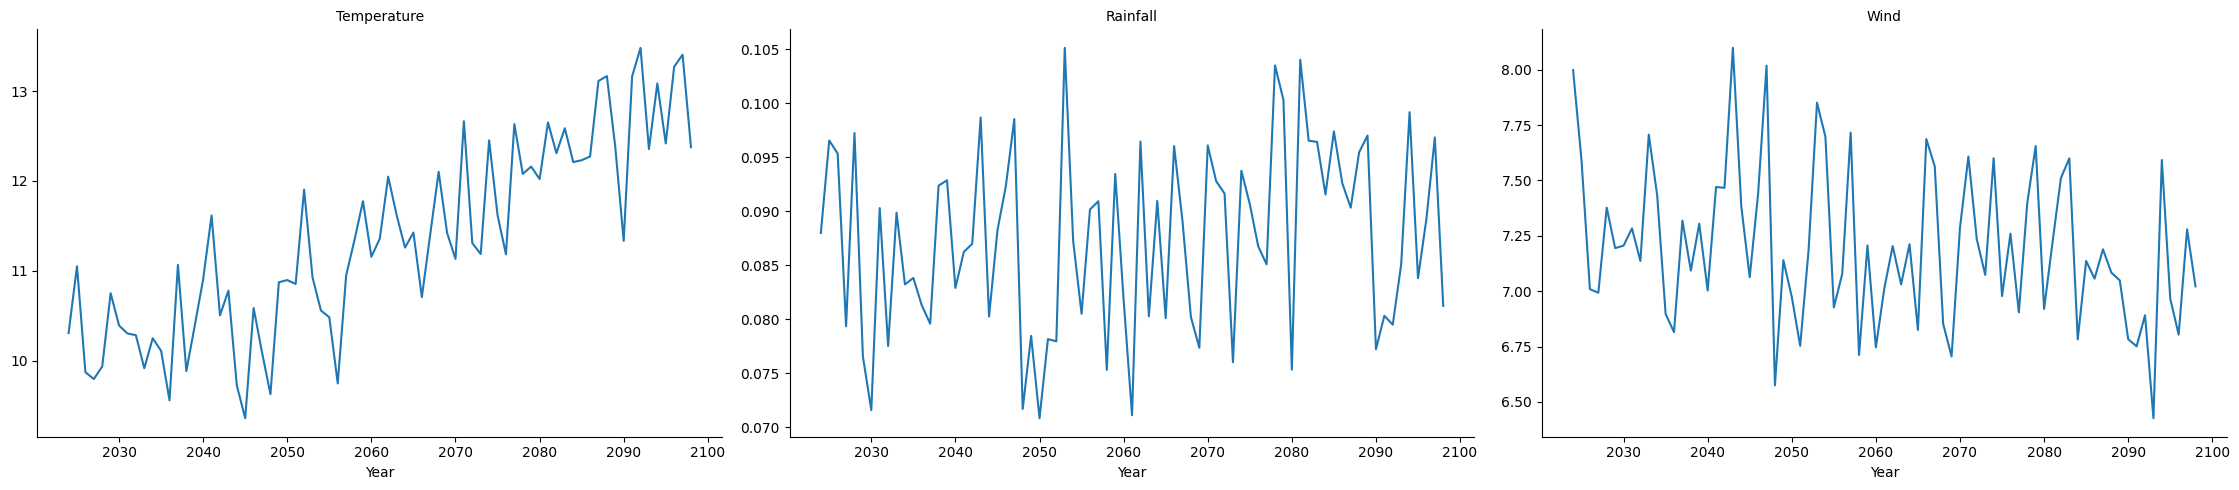

In [49]:

# Melt the dataframe to long format for seaborn
weather_melted = weather_uk.melt(id_vars='Year', var_name='Variable', value_name='Value')

# Create a FacetGrid
g = sns.FacetGrid(weather_melted, col='Variable', col_wrap=3, sharey=False, height=5, aspect=1.5)

# Map the plot to the grid
g.map(sns.lineplot, 'Year', 'Value')

# Set axis labels and titles
g.set_axis_labels('Year', '')
g.set_titles('{col_name}')

# Adjust layout
plt.tight_layout()
plt.show()


### Low-pitched hum